## El objetivo de este ejercicio es calcular la función de valor de una política dada usando sampleo Monte Carlo.
<img src="Prediccion_MC.PNG">

In [2]:
%matplotlib inline

import gym
import matplotlib
import numpy as np

from collections import defaultdict
from lib import plotting

matplotlib.style.use('ggplot')

# en caso de correrlo en google colab
# de esta manera podremos tener la carpeta lib (donde se encuentra en ambiente Gridworld)

import sys
#if "../" not in sys.path:
#  sys.path.append("../") 

#!git clone https://github.com/julianfm7/cursoRL-FIUBA

# necesario en google colab para que sys.path busque
# y encuentre la carpeta lib donde se encuentra el ambiente Gridworld

#!mv cursoRL-FIUBA cursoRLFIUBA

import numpy as np
from lib.envs.blackjack import BlackjackEnv

In [3]:
env = BlackjackEnv()

In [115]:
def mc_prediction(policy, env, num_episodes, discount_factor=1.0):
    """
    Algoritmo de predicción Monte Carlo "primera-visita". Calcula la función de valor para una 
    politica dada usando sampleo.
    
    Argumentos:
        policy: Política, función que mapea observaciones a probabilidades de cada acción.
        env: Ambiente de OpenAI gyn.
        num_episodes: Número de episodios a samplear.
        discount_factor: factor de descuento gama.
    
    Retorna:
        Un diccionario que mapea estado -> valor.
        El estado es una tupla y el valor es un float.
    """

    # Mantiene una suma y conteo de los retornos de cada estado
    # para calcular un promedio. Podría usarse un array para guardar todos los retornos
    # pero sería ineficiente en memoria.
    # CUIDADO: las llaves de un diccionario deben ser inmutables, por ejemplo tuples
    """
    Link sobre defaultdict:
    https://docs.python.org/2/library/collections.html#collections.defaultdict
    """
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)
    
    # El valor final de la función de valor
    V = defaultdict(float)
    
    # Implementar!
    
    # CONSEJOS:
    # loop num_episodes veces
    for num_episode in range(num_episodes):
        # generar un episodio de máximo 100 pasos
        # un episodio es una lista de tuplas (estado, accion, recompensa)
        episode = []
        
        #generamos el episodio
        observation = env.reset()
        for t in range(100):
            score, dealer_score, usable_ace = observation
            action = policy(observation)
            new_observation, reward, done, _ = env.step(action)
            episode.append((observation, action, reward))
            observation = new_observation
            if done:
                break            
        
        # con el episodio generado:
        # iterar sobre los estados visitados en este episodio
        
        for s,a,r in episode:
            first_apparition = next(i for i,e in enumerate(episode) if e[0] == s)
            G = sum([e[2]*(discount_factor**i) for i,e in enumerate(episode[first_apparition:])])
            if (returns_sum[s]):
                returns_sum[s] += G
            else:
                returns_sum[s] = G
                
            if (returns_count[s]):
                returns_count[s] += 1
            else:
                returns_count[s] = 1
        
        # TIP 1: podemos usar set() para obtener estados unicos
        # por cada estado encontrar su primera aparición en el episodio (estamos implementando "primera-visita")
        # obtener el retorno a partir de ese momento
        # TIP 2: es posible iterar sobre los indices y valores devueltos por enumerate(lista) 

    for s,g in returns_sum.items():
        V[s] = g/(returns_count[s])

    return V    

In [116]:
def sample_policy(observation):
    """
    Una política que se planta si el jugador tiene un puntaje > 20 y pide otra carta caso contrario.
    """
    score, dealer_score, usable_ace = observation
    return 0 if score >= 20 else 1

In [117]:
V_test = mc_prediction(sample_policy, env, num_episodes=10)
V_test

defaultdict(float,
            {(20, 10, False): 0.5,
             (12, 10, False): -1.0,
             (14, 10, False): -1.0,
             (13, 6, False): -1.0,
             (15, 10, False): -0.6666666666666666,
             (14, 2, False): -1.0,
             (17, 7, False): -1.0,
             (17, 9, False): 1.0,
             (21, 9, False): 1.0,
             (18, 10, True): -1.0,
             (18, 10, False): -1.0,
             (19, 10, False): -1.0})

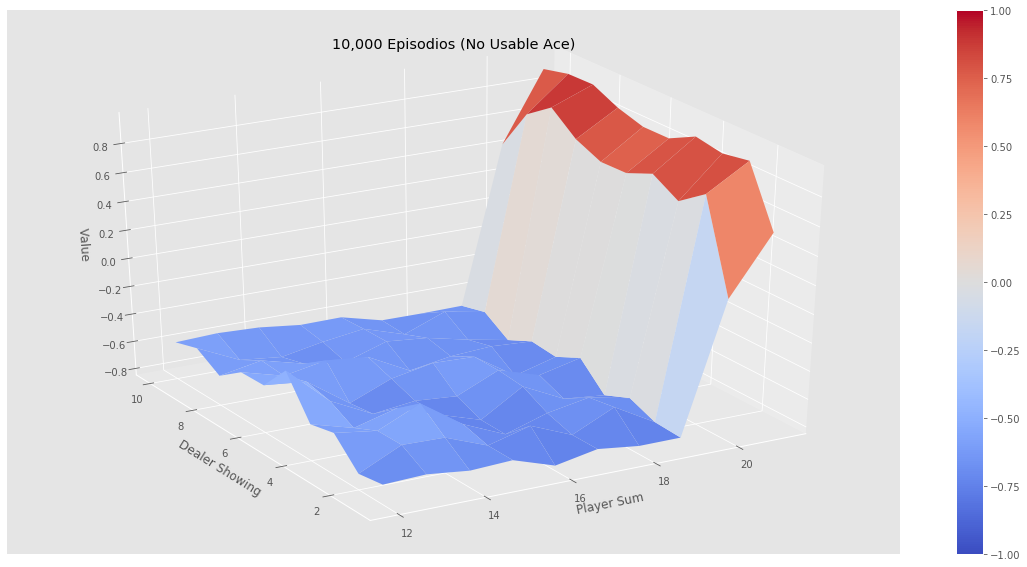

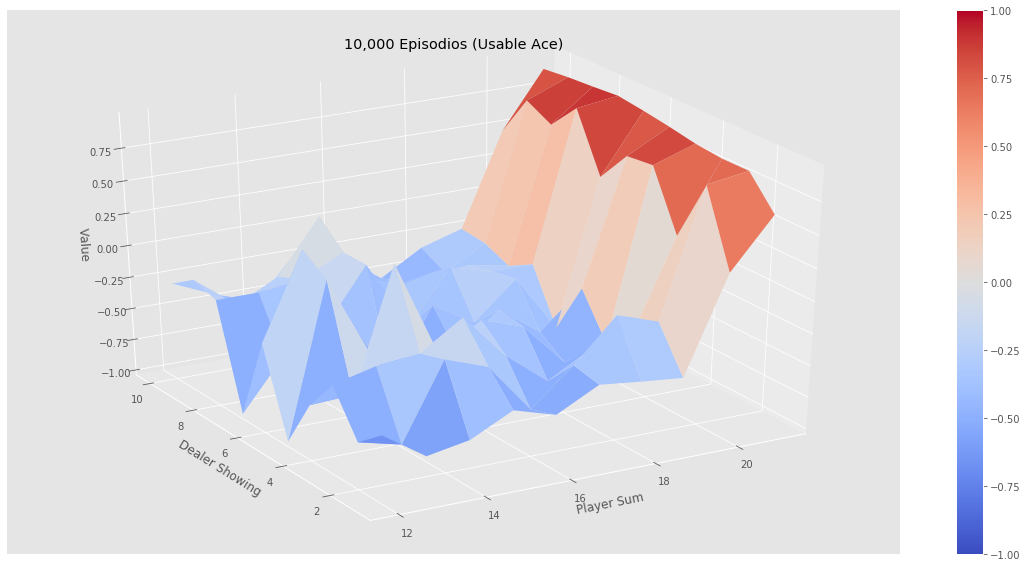

In [118]:
V_10k = mc_prediction(sample_policy, env, num_episodes=10000)
plotting.plot_value_function(V_10k, title="10,000 Episodios")

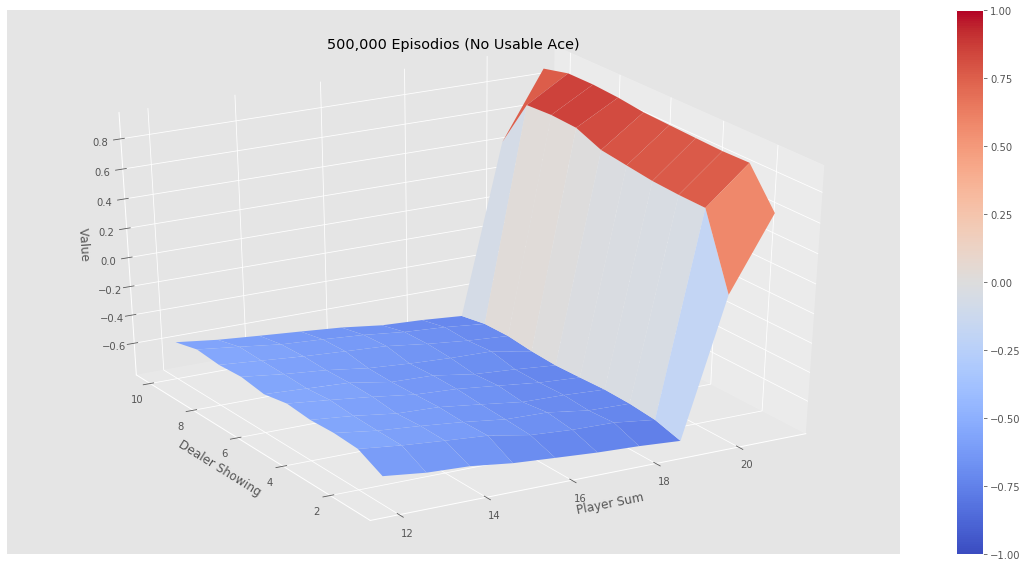

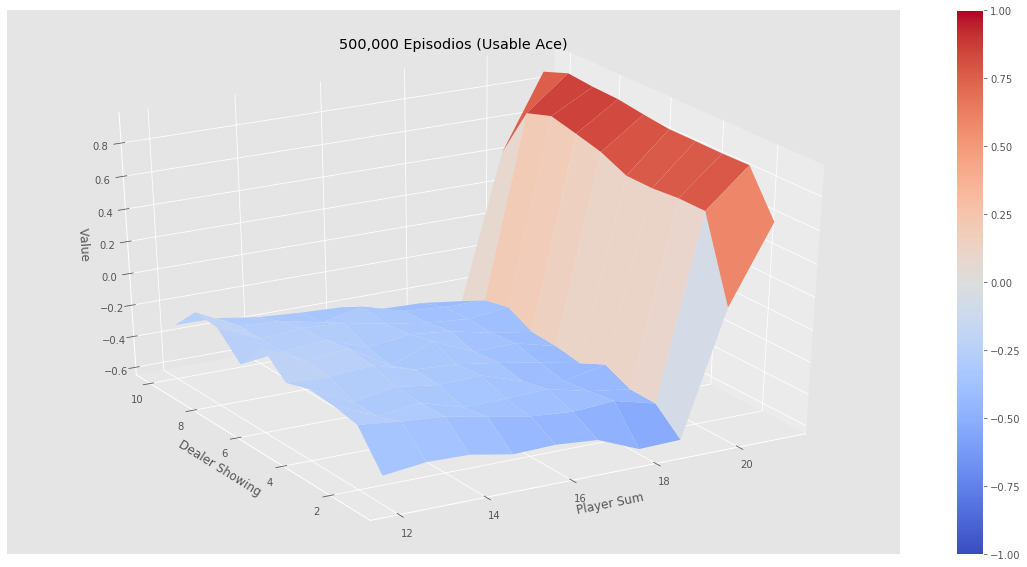

In [119]:
V_500k = mc_prediction(sample_policy, env, num_episodes=500000)
plotting.plot_value_function(V_500k, title="500,000 Episodios")